In [21]:
# Digital Assets Portfolio Optimization
# Prepared by Nicolas on 27/08/2024

# Executive Summary
# This document outlines the methodology and results of constructing an optimized digital assets portfolio.
# The portfolio includes native currencies from leading smart contract platforms, aiming to maximize returns
# while managing risk through advanced statistical measures.

# Portfolio Composition
# The portfolio will consist of the following assets:
# - Avalanche (AVAX)
# - Ethereum (ETH)
# - Solana (SOL)
# - Polkadot (DOT)
# - Aave (AAVE)
# - Chainlink (LINK)
# - Trader Joe (JOE)

# Methodology
# Return and Risk Assessment
# - Returns Calculation: We will compute the historical returns of each asset.
# - Volatility Measurement: The standard deviation of returns will be calculated to assess the volatility and risk associated with each asset.
# - Correlation Analysis: We will examine the correlations between the assets to understand their interdependencies.

# Sharpe Ratio Calculation
# The Sharpe Ratio will be utilized to evaluate the risk-adjusted return of the portfolio.
# A higher Sharpe Ratio indicates a more attractive risk-adjusted return.

# Portfolio Simulation
# We will conduct a Monte Carlo simulation with 12,000 different portfolio allocation combinations.
# The objective is to identify the allocation that maximizes the Sharpe Ratio.

# Conclusion
# The optimal portfolio allocation will be selected based on the highest Sharpe Ratio,
# providing a balanced approach to maximizing returns while minimizing risk.


In [22]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
pip install pandas_datareader


Could not fetch URL https://pypi.org/simple/pandas-datareader/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pandas-datareader/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandas_datareader (from versions: none)
ERROR: No matching distribution found for pandas_datareader


In [26]:
import pandas_datareader as pdr


ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
# creating a dataframe
my_portfolio = pd.DataFrame()

In [ ]:
# getting the data

tickers = ['AVAX-USD', 'ETH-USD', 'SOL-USD', 'AAVE-USD', 'LINK-USD', 'JOE-USD']
start_date = '2022-08-27'
end_date = '2021-08-27'

my_portfolio = pdr.get_data_yahoo(tickers, start_date, end_date)

In [ ]:
# we will mostly use the closing prices
my_portfolio['Close'].tail(3)

In [ ]:
# calculating the mean daily return
my_portfolio['Close'].pct_change(1).mean()

In [ ]:
# checking correlations
my_portfolio['Close'].pct_change(1).corr()

In [ ]:
# checking correlations
my_portfolio['Close'].pct_change(1).corr()

In [ ]:
# we will now use log returns
log_return = np.log(my_portfolio['Close']/my_portfolio['Close'].shift(1))
log_return

In [ ]:
# calculating yearly co-variance of log returns
log_return.cov()*365

In [ ]:
# Let's now put in some allocation weights and run 10,000 different possible combinations of this portfolio

# setting seed
np.random.seed(101)

num_of_simulations = 10000
all_weights = np.zeros((num_of_simulations, len(tickers)))
returns_arr = np.zeros(num_of_simulations)
volatility_arr = np.zeros(num_of_simulations)
sharpe_arr = np.zeros(num_of_simulations)


# creating a loop to run 12,000 different allocation combinations 
for index in range(num_of_simulations):
    
    # weights
    weights = np.array(np.random.random(6))
    weights = weights/np.sum(weights)
    
    # save the weights
    all_weights[index, :] = weights

    # calculating yearly expected portfolio return
    returns_arr[index] = np.sum(log_return.mean()*weights *365)

    # calculating yearly expected volatility
    volatility_arr[index] = np.sqrt(np.dot(weights.T, np.dot (log_return.cov()*365, weights)))

    # Sharpe Ratio
    sharpe_arr[index] = returns_arr[index] / volatility_arr[index]

In [ ]:
# finding the max return
sharpe_arr.max()

In [ ]:
# finding the location of that max sharpe
sharpe_arr.argmax()

In [ ]:
# using the index location to check the optimal allocations 
all_weights[3656, :]

In [27]:
max_return = returns_arr[3656]
max_volatility = volatility_arr[3656]

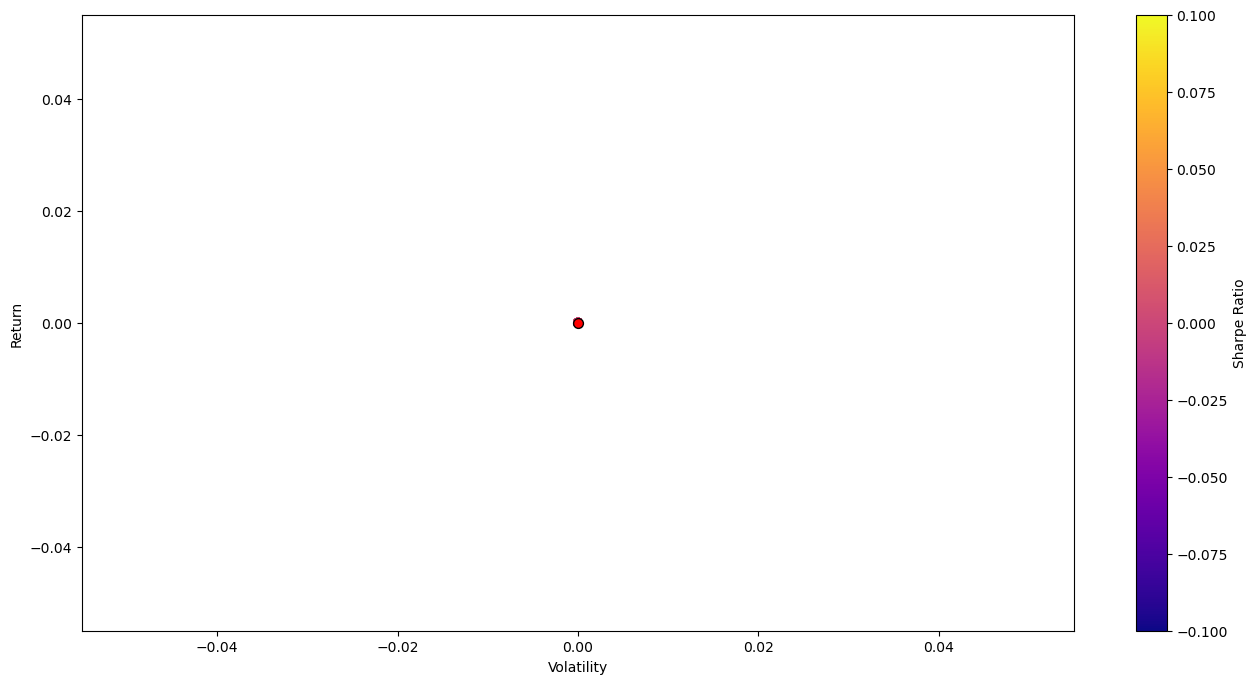

In [28]:
plt.figure(figsize=(16, 8));
plt.scatter(volatility_arr, returns_arr, c=sharpe_arr, cmap='plasma');
plt.colorbar(label = 'Sharpe Ratio');
plt.xlabel('Volatility');
plt.ylabel('Return');

# grabbing the max sharpe ratio (will plot as a red dot)
plt.scatter(max_volatility, max_return, c='red', s=50, edgecolors='black');

In [ ]:
# Conclusion:
# The allocation combination with the highest sharpe ratio:
# Cardano (ADA): 19.61%
# Ethereum (ETH): 43.03%
# Algorand (ALGO): 0.10%
# Zilliqa (ZIL): 2.32%
# Hedera (HBAR): 11.35%
# Solana(SOL): 23.56%

# Although at the end of the day allocation will always depend on the risk tolerance of each individual
# The above allocation is considered one with a high return and a relatively low risk